<a href="https://colab.research.google.com/github/Belac44/Patient-Survival-Prediction/blob/main/Patient_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df =  pd.read_csv('Training_set_begs.csv')

In [3]:
df.shape

(23097, 18)

In [4]:
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [6]:
df.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [7]:
df.nunique()

ID_Patient_Care_Situation    23097
Diagnosed_Condition             53
Patient_ID                   10570
Treated_with_drugs              32
Patient_Age                     78
Patient_Body_Mass_Index      10570
Patient_Smoker                   3
Patient_Rural_Urban              2
Patient_mental_condition         1
A                                2
B                                2
C                                2
D                                2
E                                2
F                                2
Z                                2
Number_of_prev_cond              5
Survived_1_year                  2
dtype: int64

In [8]:
df['Survived_1_year'].value_counts()

1    14603
0     8494
Name: Survived_1_year, dtype: int64

In [9]:
X = df.drop(columns = 'Survived_1_year')
y = df['Survived_1_year']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42,stratify = y)

In [11]:
X_train.shape

(17322, 17)

In [12]:
X_train.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
2537,25783,22,10611,DX6,0,28.600467,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1252,21336,13,6320,DX1 DX2 DX4,22,18.024619,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
20467,16420,13,7805,DX3 DX5,42,25.416380,YES,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7177,24864,28,11797,DX6,11,24.303574,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
14240,21797,21,1559,DX6,60,19.492160,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0


In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17322 entries, 2537 to 22482
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  17322 non-null  int64  
 1   Diagnosed_Condition        17322 non-null  int64  
 2   Patient_ID                 17322 non-null  int64  
 3   Treated_with_drugs         17315 non-null  object 
 4   Patient_Age                17322 non-null  int64  
 5   Patient_Body_Mass_Index    17322 non-null  float64
 6   Patient_Smoker             17322 non-null  object 
 7   Patient_Rural_Urban        17322 non-null  object 
 8   Patient_mental_condition   17322 non-null  object 
 9   A                          16370 non-null  float64
 10  B                          16370 non-null  float64
 11  C                          16370 non-null  float64
 12  D                          16370 non-null  float64
 13  E                          16370 non-null  

In [14]:
X_train.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond
count,17322.000000,17322.000000,17322.000000,17322.000000,17322.000000,16370.000000,16370.000000,16370.000000,16370.000000,16370.000000,16370.000000,16370.000000,16370.000000
mean,16576.728669,26.529096,6261.863353,33.171285,23.455713,0.899878,0.136958,0.186255,0.083018,0.392303,0.053635,0.000428,1.752474
std,9532.540325,15.005289,3595.998701,19.563157,3.805282,0.300172,0.343813,0.389324,0.275917,0.488279,0.225302,0.020675,0.770073
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,8284.250000,13.000000,3198.000000,16.000000,20.197874,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,16675.500000,27.000000,6235.500000,33.000000,23.399855,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,24827.250000,40.000000,9355.750000,50.000000,26.783642,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [15]:
y_train.value_counts(normalize=True) * 100

1    63.225955
0    36.774045
Name: Survived_1_year, dtype: float64

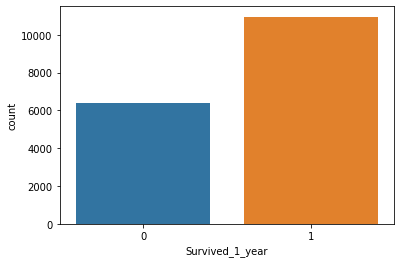

In [16]:
sns.countplot(y_train)
plt.show()

In [17]:
X_train.isnull().sum()

ID_Patient_Care_Situation      0
Diagnosed_Condition            0
Patient_ID                     0
Treated_with_drugs             7
Patient_Age                    0
Patient_Body_Mass_Index        0
Patient_Smoker                 0
Patient_Rural_Urban            0
Patient_mental_condition       0
A                            952
B                            952
C                            952
D                            952
E                            952
F                            952
Z                            952
Number_of_prev_cond          952
dtype: int64

In [18]:
#A function to help us fill missing values
def fill_missing(dataset,column):
  dataset[column].fillna(dataset[column].mode()[0],inplace = True)

In [19]:
fill_missing(X_train,'Treated_with_drugs')
fill_missing(X_train,'A')
fill_missing(X_train,'B')
fill_missing(X_train,'C')
fill_missing(X_train,'D')
fill_missing(X_train,'E')
fill_missing(X_train,'F')
fill_missing(X_train,'Z')
fill_missing(X_train,'Number_of_prev_cond')

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17322 entries, 2537 to 22482
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  17322 non-null  int64  
 1   Diagnosed_Condition        17322 non-null  int64  
 2   Patient_ID                 17322 non-null  int64  
 3   Treated_with_drugs         17322 non-null  object 
 4   Patient_Age                17322 non-null  int64  
 5   Patient_Body_Mass_Index    17322 non-null  float64
 6   Patient_Smoker             17322 non-null  object 
 7   Patient_Rural_Urban        17322 non-null  object 
 8   Patient_mental_condition   17322 non-null  object 
 9   A                          17322 non-null  float64
 10  B                          17322 non-null  float64
 11  C                          17322 non-null  float64
 12  D                          17322 non-null  float64
 13  E                          17322 non-null  

In [21]:
#Observe the Outliers in the numerical columns using multivariate outlier analysis
numeric_columns_data = X_train[['Diagnosed_Condition','Patient_Age','Patient_Body_Mass_Index','Number_of_prev_cond']]

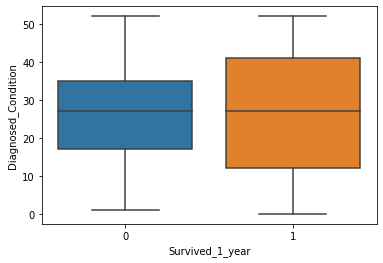

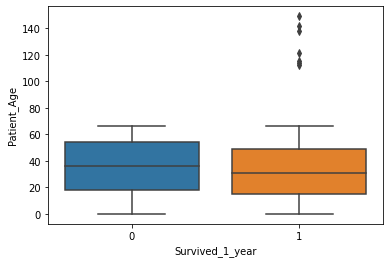

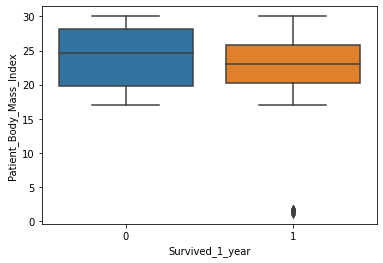

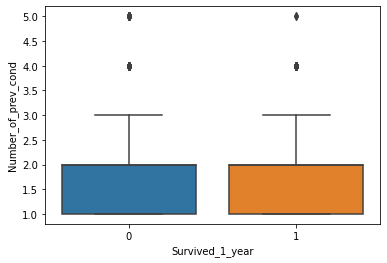

In [22]:
for columns in numeric_columns_data.columns:
  sns.boxplot(x = y_train,y = columns,data = numeric_columns_data)
  plt.show()

In [23]:
from scipy import stats

z = np.abs(stats.zscore(X_train[numeric_columns_data.columns]))
z

array([[0.30184202, 1.69564878, 1.3520425 , 0.92595828],
       [0.90164784, 0.57105342, 1.42729272, 0.37615646],
       [0.90164784, 0.45130599, 0.51526369, 0.92595828],
       ...,
       [0.03138344, 1.3203115 , 0.39419071, 0.37615646],
       [1.2309951 , 0.70689585, 1.69932299, 1.67827119],
       [0.83112455, 1.3203115 , 0.32053588, 1.67827119]])

In [24]:
# We observe that the 'Patient Age','Body Mass Index' and 
#'Number of prev Conditions' columns data have outliers

age_mean = X_train['Patient_Age'].mean()
age_std = X_train['Patient_Age'].std()
#lower limit threshold == Mean - 3 * std
llt = age_mean - (3 * age_std)
#Higher limit threshold == Mean + 3 * std
hlt = age_mean + (3 * age_std)

X_train_outlier_free =X_train[(X_train['Patient_Age'] < hlt) & (X_train['Patient_Age'] > llt)] 

In [25]:
X_train_outlier_free.shape

(17315, 17)

In [26]:
X_train.shape

(17322, 17)

In [27]:
bmi_mean = X_train_outlier_free['Patient_Body_Mass_Index'].mean()
bmi_std = X_train_outlier_free['Patient_Body_Mass_Index'].std()
#lower limit threshold == Mean - 3 * std
llt = bmi_mean - (3 * bmi_std)
#Higher limit threshold == Mean + 3 * std
hlt = bmi_mean + (3 * bmi_std)

X_train_outlier_free =X_train_outlier_free[(X_train_outlier_free['Patient_Body_Mass_Index'] < hlt) & (X_train_outlier_free['Patient_Body_Mass_Index'] > llt)]  

In [28]:
X_train_outlier_free.shape

(17315, 17)

In [29]:
llt

12.123223356835078

In [30]:
hlt

34.80591959899644

In [31]:
X_train_outlier_free['Patient_Body_Mass_Index'].describe()

count    17315.000000
mean        23.464571
std          3.780449
min         17.000336
25%         20.203355
50%         23.400853
75%         26.784358
max         29.999579
Name: Patient_Body_Mass_Index, dtype: float64

In [32]:
comp_columns = X_train[['Patient_Body_Mass_Index','Patient_Age']]

In [33]:
comp_columns.sort_values(by = 'Patient_Age')

,Patient_Body_Mass_Index,Patient_Age
2537,28.600467,0
20562,24.822337,0
18060,17.999719,0
21396,20.566725,0
16683,23.801651,0
...,...,...
19123,1.819900,115
21705,1.089300,121
10388,1.374500,138
6308,1.570100,142


In [34]:
#Apparently,Patient_Body_Mass_Index Outliers were removed with the age outlier which is
# good.

In [35]:
prev_cond_mean = X_train_outlier_free['Number_of_prev_cond'].mean()
prev_cond_std = X_train_outlier_free['Number_of_prev_cond'].std()
#lower limit threshold == Mean - 3 * std
llt = prev_cond_mean - (3 * prev_cond_std)
#Higher limit threshold == Mean + 3 * std
hlt = prev_cond_mean + (3 * prev_cond_std)

X_train_outlier_free = X_train_outlier_free[(X_train_outlier_free['Number_of_prev_cond'] < hlt) & (X_train_outlier_free['Number_of_prev_cond'] > llt)]

In [36]:
X_train_outlier_free.shape

(17289, 17)

In [37]:
llt

-0.5926709217055806

In [38]:
hlt

4.015483511945257

In [39]:
X_train_outlier_free['Number_of_prev_cond'].describe()

count    17289.000000
mean         1.706461
std          0.757932
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: Number_of_prev_cond, dtype: float64

In [40]:
numeric_columns_data = X_train_outlier_free[['Diagnosed_Condition','Patient_Age','Patient_Body_Mass_Index','Number_of_prev_cond']]

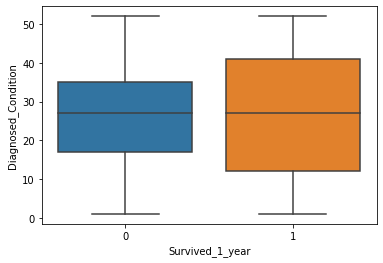

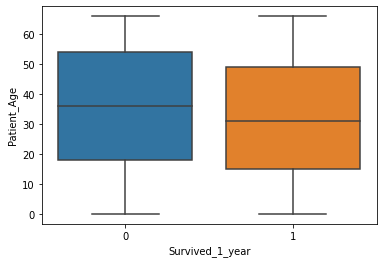

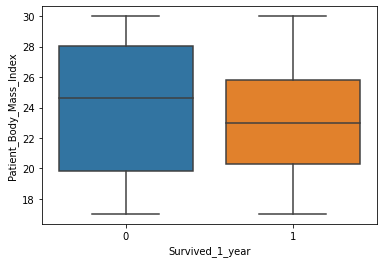

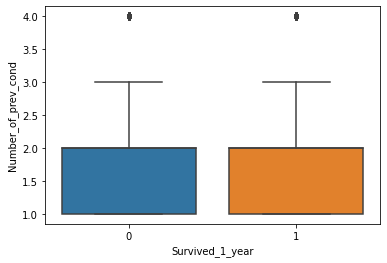

In [41]:
for columns in numeric_columns_data.columns:
  sns.boxplot(x = y_train,y = columns,data = numeric_columns_data)
  plt.show()

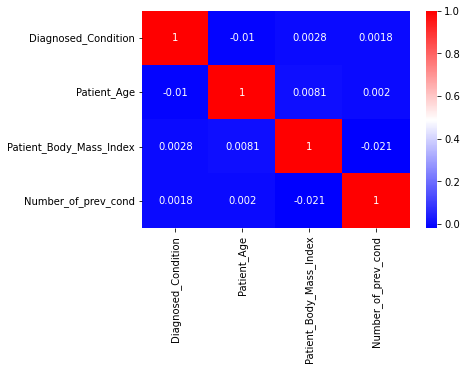

In [42]:
sns.heatmap(numeric_columns_data.corr(),cmap = 'bwr',annot = True)
plt.show()

In [43]:
X_train_outlier_free.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond'],
      dtype='object')

In [44]:
#Categorical columns
categorical_columns_data = X_train_outlier_free[['Patient_Smoker','Treated_with_drugs','Patient_Rural_Urban','A','B','C','D','E','F','Z']]


In [45]:
categorical_columns_data.nunique()

Patient_Smoker          2
Treated_with_drugs     32
Patient_Rural_Urban     2
A                       2
B                       2
C                       2
D                       2
E                       2
F                       2
Z                       1
dtype: int64

In [46]:
X_train_outlier_free['Treated_with_drugs'].value_counts()

DX6                     6405
DX2                     1432
DX5                     1406
DX1                     1397
DX3                     1372
DX4                     1346
DX1 DX2                  341
DX3 DX4                  341
DX4 DX5                  326
DX3 DX5                  326
DX2 DX5                  316
DX1 DX3                  312
DX1 DX5                  306
DX1 DX4                  296
DX2 DX3                  292
DX2 DX4                  291
DX1 DX2 DX4               79
DX1 DX2 DX5               78
DX1 DX3 DX5               75
DX1 DX2 DX3               74
DX2 DX3 DX5               73
DX3 DX4 DX5               72
DX2 DX4 DX5               66
DX1 DX4 DX5               65
DX2 DX3 DX4               64
DX1 DX3 DX4               56
DX1 DX3 DX4 DX5           18
DX1 DX2 DX3 DX4           17
DX2 DX3 DX4 DX5           16
DX1 DX2 DX4 DX5           15
DX1 DX2 DX3 DX5           13
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

In [47]:
# Create dummy variables from the categorical columns
drugs = X_train_outlier_free['Treated_with_drugs'].str.get_dummies(sep = ' ')
drugs.head()

,DX1,DX2,DX3,DX4,DX5,DX6
2537,0,0,0,0,0,1
1252,1,1,0,1,0,0
20467,0,0,1,0,1,0
7177,0,0,0,0,0,1
14240,0,0,0,0,0,1


In [48]:
drugs.shape

(17289, 6)

In [49]:
X_train = pd.concat([X_train_outlier_free.drop(columns = 'Treated_with_drugs'),drugs],axis = 1)
X_train.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,...,E,F,Z,Number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6
2537,25783,22,10611,0,28.600467,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,0.0,1.0,0,0,0,0,0,1
1252,21336,13,6320,22,18.024619,YES,RURAL,Stable,1.0,0.0,...,1.0,0.0,0.0,2.0,1,1,0,1,0,0
20467,16420,13,7805,42,25.416380,YES,RURAL,Stable,1.0,0.0,...,0.0,0.0,0.0,1.0,0,0,1,0,1,0
7177,24864,28,11797,11,24.303574,NO,URBAN,Stable,1.0,1.0,...,0.0,0.0,0.0,2.0,0,0,0,0,0,1
14240,21797,21,1559,60,19.492160,NO,RURAL,Stable,1.0,1.0,...,1.0,0.0,0.0,4.0,0,0,0,0,0,1


In [50]:
X_train = pd.get_dummies(X_train,columns = ['Patient_Smoker','Patient_Rural_Urban'])

In [51]:
X_train.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_mental_condition,A,B,C,D,...,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
2537,25783,22,10611,0,28.600467,Stable,1.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,1,0
1252,21336,13,6320,22,18.024619,Stable,1.0,0.0,0.0,0.0,...,1,1,0,1,0,0,0,1,1,0
20467,16420,13,7805,42,25.416380,Stable,1.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,1,1,0
7177,24864,28,11797,11,24.303574,Stable,1.0,1.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,1
14240,21797,21,1559,60,19.492160,Stable,1.0,1.0,0.0,1.0,...,0,0,0,0,0,1,1,0,1,0


In [52]:
X_train = X_train.drop(columns =['Patient_mental_condition','ID_Patient_Care_Situation'])

In [53]:
X_train.head()

,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,...,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
2537,22,10611,0,28.600467,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,1,0
1252,13,6320,22,18.024619,1.0,0.0,0.0,0.0,1.0,0.0,...,1,1,0,1,0,0,0,1,1,0
20467,13,7805,42,25.416380,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,1,1,0
7177,28,11797,11,24.303574,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,1
14240,21,1559,60,19.492160,1.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,1,1,0,1,0


In [54]:
X_train.shape

(17289, 22)

In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17289 entries, 2537 to 22482
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diagnosed_Condition        17289 non-null  int64  
 1   Patient_ID                 17289 non-null  int64  
 2   Patient_Age                17289 non-null  int64  
 3   Patient_Body_Mass_Index    17289 non-null  float64
 4   A                          17289 non-null  float64
 5   B                          17289 non-null  float64
 6   C                          17289 non-null  float64
 7   D                          17289 non-null  float64
 8   E                          17289 non-null  float64
 9   F                          17289 non-null  float64
 10  Z                          17289 non-null  float64
 11  Number_of_prev_cond        17289 non-null  float64
 12  DX1                        17289 non-null  int64  
 13  DX2                        17289 non-null  

In [56]:
X_test.head()


,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
18301,32479,19,6292,DX1 DX3,9,21.528188,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6357,15416,14,9652,DX1 DX5,66,17.637732,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16768,3436,7,5283,DX6,3,24.579787,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6913,32384,21,12441,DX4,59,27.077415,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0
11218,17183,18,569,DX3,43,19.415246,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [57]:
X_test.isnull().sum()

ID_Patient_Care_Situation      0
Diagnosed_Condition            0
Patient_ID                     0
Treated_with_drugs             6
Patient_Age                    0
Patient_Body_Mass_Index        0
Patient_Smoker                 0
Patient_Rural_Urban            0
Patient_mental_condition       0
A                            283
B                            283
C                            283
D                            283
E                            283
F                            283
Z                            283
Number_of_prev_cond          283
dtype: int64

In [58]:
fill_missing(X_test,'Treated_with_drugs')
fill_missing(X_test,'A')
fill_missing(X_test,'C')
fill_missing(X_test,'B')
fill_missing(X_test,'D')
fill_missing(X_test,'E')
fill_missing(X_test,'F')
fill_missing(X_test,'Z')
fill_missing(X_test,'Number_of_prev_cond')

In [59]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5775 entries, 18301 to 19927
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  5775 non-null   int64  
 1   Diagnosed_Condition        5775 non-null   int64  
 2   Patient_ID                 5775 non-null   int64  
 3   Treated_with_drugs         5775 non-null   object 
 4   Patient_Age                5775 non-null   int64  
 5   Patient_Body_Mass_Index    5775 non-null   float64
 6   Patient_Smoker             5775 non-null   object 
 7   Patient_Rural_Urban        5775 non-null   object 
 8   Patient_mental_condition   5775 non-null   object 
 9   A                          5775 non-null   float64
 10  B                          5775 non-null   float64
 11  C                          5775 non-null   float64
 12  D                          5775 non-null   float64
 13  E                          5775 non-null   

In [60]:
drugs = X_test['Treated_with_drugs'].str.get_dummies(sep = " ")
X_test = pd.concat([X_test.drop(columns = 'Treated_with_drugs'),drugs],axis = 1)

In [61]:
X_test.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,...,E,F,Z,Number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6
18301,32479,19,6292,9,21.528188,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,0.0,1.0,1,0,1,0,0,0
6357,15416,14,9652,66,17.637732,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,0.0,1.0,1,0,0,0,1,0
16768,3436,7,5283,3,24.579787,NO,URBAN,Stable,1.0,0.0,...,0.0,0.0,0.0,1.0,0,0,0,0,0,1
6913,32384,21,12441,59,27.077415,NO,URBAN,Stable,1.0,0.0,...,1.0,1.0,0.0,3.0,0,0,0,1,0,0
11218,17183,18,569,43,19.415246,YES,RURAL,Stable,1.0,0.0,...,0.0,0.0,0.0,1.0,0,0,1,0,0,0


In [62]:
X_test.Patient_Smoker[X_test['Patient_Smoker'] == "Cannot say"] = 'NO' 

In [63]:
X_test = pd.get_dummies(X_test,columns = ['Patient_Smoker','Patient_Rural_Urban'])

In [64]:
X_test.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_mental_condition,A,B,C,D,...,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
18301,32479,19,6292,9,21.528188,Stable,1.0,0.0,0.0,0.0,...,1,0,1,0,0,0,1,0,1,0
6357,15416,14,9652,66,17.637732,Stable,1.0,0.0,0.0,0.0,...,1,0,0,0,1,0,1,0,1,0
16768,3436,7,5283,3,24.579787,Stable,1.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,1
6913,32384,21,12441,59,27.077415,Stable,1.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,1
11218,17183,18,569,43,19.415246,Stable,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,1,0


In [65]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5775 entries, 18301 to 19927
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  5775 non-null   int64  
 1   Diagnosed_Condition        5775 non-null   int64  
 2   Patient_ID                 5775 non-null   int64  
 3   Patient_Age                5775 non-null   int64  
 4   Patient_Body_Mass_Index    5775 non-null   float64
 5   Patient_mental_condition   5775 non-null   object 
 6   A                          5775 non-null   float64
 7   B                          5775 non-null   float64
 8   C                          5775 non-null   float64
 9   D                          5775 non-null   float64
 10  E                          5775 non-null   float64
 11  F                          5775 non-null   float64
 12  Z                          5775 non-null   float64
 13  Number_of_prev_cond        5775 non-null   

In [66]:
X_test = X_test.drop(columns = ['Patient_mental_condition','ID_Patient_Care_Situation'])

In [67]:
X_test.head()

,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,...,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
18301,19,6292,9,21.528188,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,1,0,1,0
6357,14,9652,66,17.637732,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,1,0,1,0
16768,7,5283,3,24.579787,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,1
6913,21,12441,59,27.077415,1.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,1,0,0,1,0,0,1
11218,18,569,43,19.415246,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,1,0


In [68]:
X = pd.merge(X_train,y_train,how = 'inner',left_index=True,right_index = True )

In [69]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17289 entries, 2537 to 22482
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diagnosed_Condition        17289 non-null  int64  
 1   Patient_ID                 17289 non-null  int64  
 2   Patient_Age                17289 non-null  int64  
 3   Patient_Body_Mass_Index    17289 non-null  float64
 4   A                          17289 non-null  float64
 5   B                          17289 non-null  float64
 6   C                          17289 non-null  float64
 7   D                          17289 non-null  float64
 8   E                          17289 non-null  float64
 9   F                          17289 non-null  float64
 10  Z                          17289 non-null  float64
 11  Number_of_prev_cond        17289 non-null  float64
 12  DX1                        17289 non-null  int64  
 13  DX2                        17289 non-null  

In [70]:
y_train = X['Survived_1_year']
X_train = X.drop(columns = 'Survived_1_year')

In [71]:
X_train.shape

(17289, 22)

In [72]:
y_train.shape

(17289,)

In [73]:
X = pd.merge(X_test,y_test,how = 'inner',left_index=True,right_index=True)

In [74]:
X_test = X.drop(columns = 'Survived_1_year')
y_test = X['Survived_1_year']

In [75]:
X_test.shape

(5775, 22)

In [76]:
y_test.shape

(5775,)

In [77]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter= 1000)
lg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [78]:
y_pred = lg.predict(X_test)

In [79]:
from sklearn.metrics import f1_score
f1_score(y_pred,y_test)

0.8019123917818839

In [80]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42,n_estimators = 1000,max_depth = 5)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=42)

In [81]:
y_pred = rfc.predict(X_test)

In [82]:
f1_score(y_pred,y_test)

0.8357421138620084

In [83]:
!pip install Boruta

     |████████████████████████████████| 56 kB 1.9 MB/s 


In [84]:
from boruta import BorutaPy

In [85]:
rfc_ = RandomForestClassifier(random_state=42,n_estimators=1000,max_depth=5)
selector = BorutaPy(rfc_,n_estimators='auto',verbose = 2,random_state=42)
selector.fit(np.array(X_train),np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
I

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=116,
                                          random_state=RandomState(MT19937) at 0x7F724A90D6B0),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F724A90D6B0, verbose=2)

In [86]:
print("Features Selected:",selector.support_)

print("Ranking:",selector.ranking_)

print("Number of Significant features:")
selector.n_features_

Features Selected: [ True False  True  True  True False False  True False False False  True
  True  True  True  True  True  True  True  True  True  True]
Ranking: [1 3 1 1 1 2 4 1 5 6 7 1 1 1 1 1 1 1 1 1 1 1]
Number of Significant features:


16

In [87]:
features_rankings = pd.DataFrame({'Features':list(X_train),
                                  'Rankings':selector.ranking_,
                                  'Significant':selector.support_})

In [88]:
features_rankings.sort_values(by = 'Rankings')

,Features,Rankings,Significant
0,Diagnosed_Condition,1,True
19,Patient_Smoker_YES,1,True
18,Patient_Smoker_NO,1,True
17,DX6,1,True
16,DX5,1,True
15,DX4,1,True
14,DX3,1,True
13,DX2,1,True
12,DX1,1,True
11,Number_of_prev_cond,1,True


In [89]:
#Create a new dataset from the selected features
X_train_True = selector.transform(np.array(X_train))
X_test_True = selector.transform(np.array(X_test))

In [90]:
rfc_True = RandomForestClassifier(random_state=42,n_estimators=1000,n_jobs=-1)
rfc_True.fit(X_train_True,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [91]:
y_pred_ = rfc_True.predict(X_test_True)

In [92]:
f1_score(y_pred_,y_test)

0.8632592989028633

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
param_grid = {'bootstrap':[True,False],
              'max_depth':[5,10,15],
              'n_estimators':[500,1000]}


In [95]:
rf = RandomForestClassifier(random_state = 42)

grid_search = GridSearchCV(estimator = rf,param_grid = param_grid,cv = 2,n_jobs = -1,
                           verbose = 2)

In [96]:
grid_search.fit(X_train_True,y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'n_estimators': [500, 1000]},
             verbose=2)

In [97]:
grid_search.best_params_ 

{'bootstrap': True, 'max_depth': 15, 'n_estimators': 500}

In [98]:
y_pred_ = grid_search.predict(X_test_True)

In [99]:
f1_score(y_test,y_pred_)

0.8665866986538717

In [100]:
models = {'Logistic Regression':lg,'Random Forest Classifier':rfc,'Random Forest with Boruta Selector':rfc_True,
          'Hyperparameter Tuning & Random Forest & Boruta:':grid_search}

test_data = [X_test,X_test,X_test_True,X_test_True]
model_performance = []
iter = 1
for key,value in models.items():
  model_performance.append([iter,key,f1_score(y_test,value.predict(test_data[iter - 1]))])
  iter +=1

In [101]:
model_performance

[[1, 'Logistic Regression', 0.8019123917818839],
 [2, 'Random Forest Classifier', 0.8357421138620084],
 [3, 'Random Forest with Boruta Selector', 0.8632592989028633],
 [4, 'Hyperparameter Tuning & Random Forest & Boruta:', 0.8665866986538717]]